In [1]:
import pandas as pd #reading dataset
import matplotlib as mpl    #plotting, visualization
import matplotlib.pyplot as plt
import tensorflow as tf #building model
from tensorflow.keras.models import Model
import numpy as np  #playing output with model
from sklearn.model_selection import train_test_split    #model selection and scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import sys
sys.path.append('../../')   # Add parent directory to Python path
from utils.Plots import *
RANDOM_SEED = 42


In [56]:
df = pd.read_csv('../../data/handlebar/processed_segments_overlap_30.csv') 
df.drop('Unnamed: 0', axis=1, inplace=True)
df


,curb_scene,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0.0,8.762772,8.753204,8.762772,8.781937,8.753204,8.748413,8.738831,8.748413,8.743622,...,8.786728,8.801086,8.820236,8.786728,8.777145,8.772354,8.781937,8.801086,8.781937,8.753204
1,0.0,8.748413,8.753204,8.777145,8.786728,8.762772,8.743622,8.772354,8.810669,8.791504,...,8.762772,8.767563,8.777145,8.777145,8.748413,8.762772,8.805878,8.781937,8.777145,8.757996
2,0.0,8.753204,8.772354,8.786728,8.781937,8.786728,8.777145,8.738831,8.820236,8.738831,...,8.767563,8.772354,8.757996,8.786728,8.777145,8.781937,8.786728,8.767563,8.781937,8.796295
3,0.0,8.767563,8.781937,8.781937,8.757996,8.753204,8.753204,8.719681,8.781937,8.767563,...,8.757996,8.786728,8.791504,8.781937,8.772354,8.762772,8.781937,8.762772,8.767563,8.791504
4,0.0,8.777145,8.748413,8.748413,8.748413,8.748413,8.738831,8.748413,8.748413,8.762772,...,8.781937,8.772354,8.762772,8.743622,8.738831,8.772354,8.762772,8.762772,8.777145,8.772354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6650,1.0,34.648895,23.879776,15.988480,6.268021,10.884048,19.613297,-0.957687,-21.456833,-36.889862,...,15.940598,18.382675,11.247955,3.294418,-5.956772,-6.038177,11.578354,21.950043,22.313965,7.627930
6651,1.0,-16.850388,-22.639572,-22.639572,-20.824768,-15.040375,-7.125137,14.954178,24.617188,25.215729,...,20.561401,15.883133,15.883133,11.774689,13.302185,10.544067,17.769760,16.610977,13.584702,10.773910
6652,1.0,-8.896851,-4.151550,7.278366,21.523880,21.035461,5.750870,-1.857895,9.940720,19.254166,...,10.831375,6.464340,3.624817,6.660675,13.565552,10.951080,3.519470,1.924942,-13.852844,-13.852844
6653,1.0,0.258575,2.590530,12.804184,13.962982,13.962982,12.344498,2.758118,2.758118,3.347092,...,5.104431,0.574615,9.016571,19.579788,11.305420,11.305420,-5.975922,-22.026657,-15.983688,10.831375


In [57]:
# Suppose df is your DataFrame, and df['curb_scene'] is your label column
train_data, test_data, train_labels, test_labels = train_test_split(df, df['curb_scene'], 
                                                                    test_size=0.2, 
                                                                    random_state=RANDOM_SEED)


In [58]:
#scaling data, because neural network works better with scaled data
scaler = StandardScaler()
data_scaled = scaler.fit(train_data.iloc[:, 1:])
#transform data
train_data_scaled = scaler.transform(train_data.iloc[:, 1:])
test_data_scaled = scaler.transform(test_data.iloc[:, 1:])


In [59]:
# Convert the scaled data back to DataFrames for further processing
train_data_scaled_df = pd.DataFrame(train_data_scaled, columns=train_data.columns[1:])
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=test_data.columns[1:])
train_data_scaled_df['curb_scene'] = train_data['curb_scene'].values
test_data_scaled_df['curb_scene'] = test_data['curb_scene'].values
train_data_scaled_df.head()


,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,Acc-Z_10,...,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100,curb_scene
0,-0.009467,-0.024876,-0.034488,-0.030541,-0.028756,-0.008029,-0.026201,-0.042539,-0.038791,-0.039047,...,-0.048869,-0.027997,-0.023041,-0.004761,-0.018058,-0.020362,-0.016143,-0.009066,-0.015426,0.0
1,-0.039555,-0.048821,-0.060054,-0.060283,-0.054804,-0.029762,-0.049963,-0.059971,-0.061313,-0.067960,...,-0.080730,-0.067410,-0.051431,-0.026098,-0.043451,-0.047635,-0.054567,-0.042872,-0.043413,0.0
2,-1.163023,0.884251,1.682989,0.998353,-0.864854,-1.329563,-0.109370,0.174566,0.181428,-0.513907,...,0.929405,0.369051,-0.468083,-0.810973,0.021122,0.570051,0.346915,-1.372561,-2.247281,0.0
3,-0.700721,-0.496045,0.191719,-0.128608,-0.565706,0.870488,0.654200,0.790230,-0.921330,-1.559123,...,1.142294,0.386569,-1.362769,-1.030433,0.685730,1.910507,1.137331,-0.597445,-0.886092,0.0
4,-0.432146,-0.179357,0.028259,0.760423,1.028341,-0.318141,-0.461849,-0.272324,0.220633,0.363093,...,-0.120555,-0.056463,-0.033017,-0.023813,-0.065217,-0.078118,-0.031043,-0.044482,-0.027088,0.0


In [60]:
# Filter and slice the data
normal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 0.0].iloc[:, :-1]
abnormal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 1.0].iloc[:, :-1]
normal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 0.0].iloc[:, :-1]
abnormal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 1.0].iloc[:, :-1]
# Example usage: Accessing the original index
print(normal_test_data_scaled.index)
print(abnormal_test_data_scaled.index)

Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
       ...
       1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330],
      dtype='int64', length=1286)
Index([   0,   18,   19,   27,   56,   68,   89,  118,  220,  374,  410,  508,
        511,  522,  535,  570,  589,  598,  613,  619,  628,  632,  636,  658,
        683,  689,  714,  806,  830,  848,  855,  870,  879,  897,  920,  936,
        962,  967, 1042, 1113, 1221, 1237, 1246, 1253, 1264],
      dtype='int64')


In [61]:
# Cast to float32
normal_train_data_scaled = normal_train_data_scaled.astype("float32")
abnormal_train_data_scaled = abnormal_train_data_scaled.astype("float32")
normal_test_data_scaled = normal_test_data_scaled.astype("float32")
abnormal_test_data_scaled = abnormal_test_data_scaled.astype("float32")

In [63]:
#Allow me to use data in different ways
class AutoEncoder(Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='tanh'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(32, activation='tanh'),
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='tanh'),
            tf.keras.layers.Dropout(0.2), 
            tf.keras.layers.Dense(100, activation='tanh')
        ])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        #returns me a decoder object
        return decoded

In [64]:
#define model
model = AutoEncoder()
#if in 2 Epochs, loss is not decreasing, stop the training
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min')
model.compile(optimizer='adam', loss='mae')

In [65]:
# seprate class as well for normal and abnormal data invalidation data
history = model.fit(normal_train_data_scaled, 
                    normal_train_data_scaled,
                    epochs=150, 
                    batch_size=128,
                    validation_split=0.3, 
                    shuffle=True, 
                    callbacks=[early_stopping])

Epoch 1/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4694 - val_loss: 0.4139
Epoch 2/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3951 - val_loss: 0.3760
Epoch 3/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3668 - val_loss: 0.3560
Epoch 4/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3452 - val_loss: 0.3441
Epoch 5/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3334 - val_loss: 0.3352
Epoch 6/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3252 - val_loss: 0.3285
Epoch 7/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3156 - val_loss: 0.3233
Epoch 8/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3132 - val_loss: 0.3181
Epoch 9/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3106 - val_loss: 0.3145
Epoch 10/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3073 - val_loss: 0.3110
Epoch 11/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3031 - val_loss: 0.3079
Epoch 12/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2

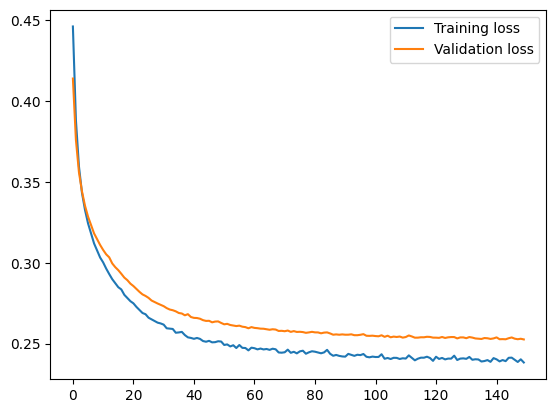

In [66]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

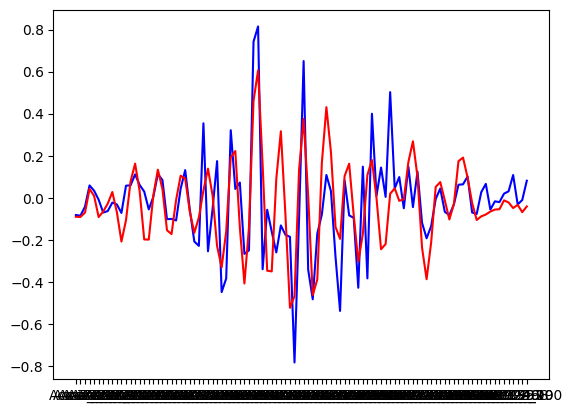

In [67]:
#normal data
#Encoder is bottleneck of 8 Units, decoder is reconstructed output of 100 units
encoder_out = model.encoder(normal_test_data_scaled).numpy()
decoder_out = model.decoder(encoder_out).numpy()
plt.plot(normal_test_data_scaled.iloc[0], 'blue')
plt.plot(decoder_out[0], 'red')

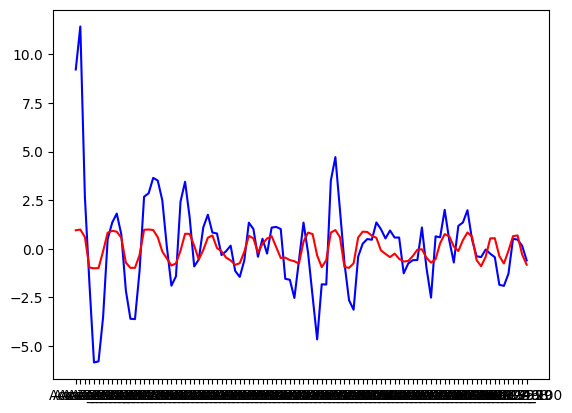

In [68]:
# abnormal data
encoder_out_abnormal = model.encoder(abnormal_test_data_scaled).numpy()
decoder_out_abnormal = model.decoder(encoder_out_abnormal).numpy()
plt.plot(abnormal_test_data_scaled.iloc[2], 'blue')
plt.plot(decoder_out_abnormal[2], 'red')

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


(array([332.,  25.,  15.,   6.,   5.,   7.,  18.,  38.,  63.,  94.,  93.,
         69.,  82.,  64.,  57.,  61.,  48.,  46.,  29.,  19.,  15.,  20.,
         15.,  16.,  11.,   8.,   8.,   5.,   2.,   3.,   4.,   3.,   1.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.]),
 array([0.00571449, 0.02995535, 0.05419621, 0.07843707, 0.10267793,
        0.12691881, 0.15115966, 0.17540053, 0.19964139, 0.22388226,
        0.24812312, 0.27236396, 0.29660481, 0.32084569, 0.34508654,
        0.36932743, 0.39356828, 0.41780913, 0.44205001, 0.46629086,
        0.49053174, 0.51477259, 0.53901345, 0.5632543 , 0.58749515,
        0.61173606, 0.63597691, 0.66021776, 0.68445861, 0.70869946,
        0.73294038, 0.75718123, 0.78142208, 0.80566293, 0.82990378,
        0.85414469, 0.87838554, 0.9026264 , 0.92686725, 0.9511081 ,
        0.97534901, 0.99958986, 1.02383077, 1.04807162, 1.07231247,
        1.09655333, 1.12079418, 1.14503503, 1.

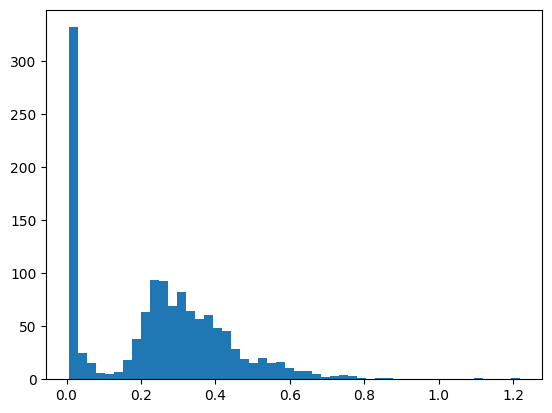

In [69]:
reconstruction_normal = model.predict(normal_test_data_scaled)    #output error between input and output
train_loss = tf.keras.losses.mae(reconstruction_normal, normal_test_data_scaled)
plt.hist(train_loss, bins=50)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


(array([1., 1., 1., 0., 0., 0., 1., 2., 0., 0., 0., 3., 4., 1., 2., 0., 0.,
        2., 2., 1., 1., 1., 1., 0., 0., 1., 1., 0., 2., 1., 1., 0., 1., 0.,
        0., 0., 6., 1., 0., 0., 2., 1., 0., 1., 2., 0., 0., 0., 0., 1.]),
 array([0.53621823, 0.59263641, 0.64905459, 0.70547277, 0.76189095,
        0.81830919, 0.87472737, 0.93114555, 0.98756373, 1.04398191,
        1.10040009, 1.15681827, 1.21323645, 1.26965463, 1.32607281,
        1.38249099, 1.43890917, 1.49532735, 1.55174565, 1.60816383,
        1.66458201, 1.72100019, 1.77741838, 1.83383656, 1.89025474,
        1.94667292, 2.0030911 , 2.05950928, 2.11592746, 2.17234564,
        2.22876382, 2.285182  , 2.34160018, 2.39801836, 2.45443654,
        2.51085472, 2.5672729 , 2.62369108, 2.68010926, 2.73652744,
        2.79294562, 2.8493638 , 2.90578198, 2.96220016, 3.01861835,
        3.07503653, 3.13145471, 3.18787289, 3.24429107, 3.30070925,
        3.35712743]),
 <BarContainer object of 50 artists>)

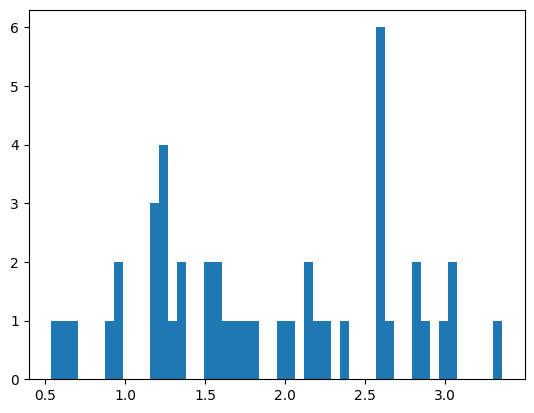

In [70]:
reconstruction_abnormal = model.predict(abnormal_test_data_scaled)
train_loss_abnormal = tf.keras.losses.mae(reconstruction_abnormal, abnormal_test_data_scaled)
plt.hist(train_loss_abnormal, bins=50)

In [71]:
# threshold auswählen nach business logic
threshold = np.mean(train_loss) + 2.5*np.std(train_loss)
threshold

np.float32(0.71282643)

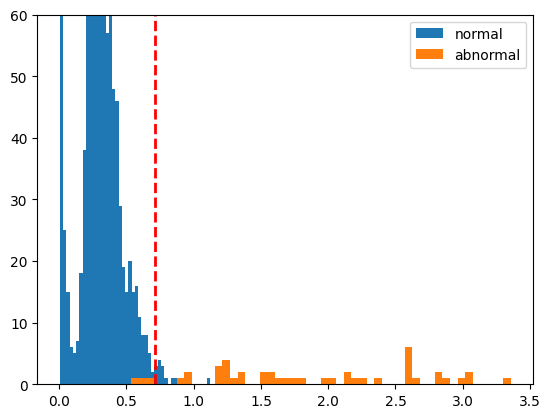

In [73]:

plt.hist(train_loss, bins=50, label='normal')
plt.hist(train_loss_abnormal, bins=50, label='abnormal')
plt.ylim(0, 60)
plt.legend()
plt.axvline(threshold, color='r', linestyle='dashed', linewidth=2,label = '{:0.3f}'.format(threshold))
plt.show()

In [74]:
preds_normal=tf.math.less(train_loss, threshold)
correct = tf.math.count_nonzero(preds_normal)
false_predictions_normal = [i for i, x in enumerate(preds_normal) if not x]
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds_normal))
print("False Predictions index: ", false_predictions_normal)

Correct Predictions:  1273
Accuracy:  0.9898911353032659
False Predictions index:  [33, 185, 197, 356, 383, 396, 602, 653, 911, 939, 1150, 1203, 1216]


In [75]:
preds_abnormal=tf.math.greater(train_loss_abnormal, threshold)
correct = tf.math.count_nonzero(preds_abnormal)
false_predictions_abnormal = [i for i, x in enumerate(preds_abnormal) if not x]
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds_abnormal))

Correct Predictions:  42
Accuracy:  0.9333333333333333


 1/42 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


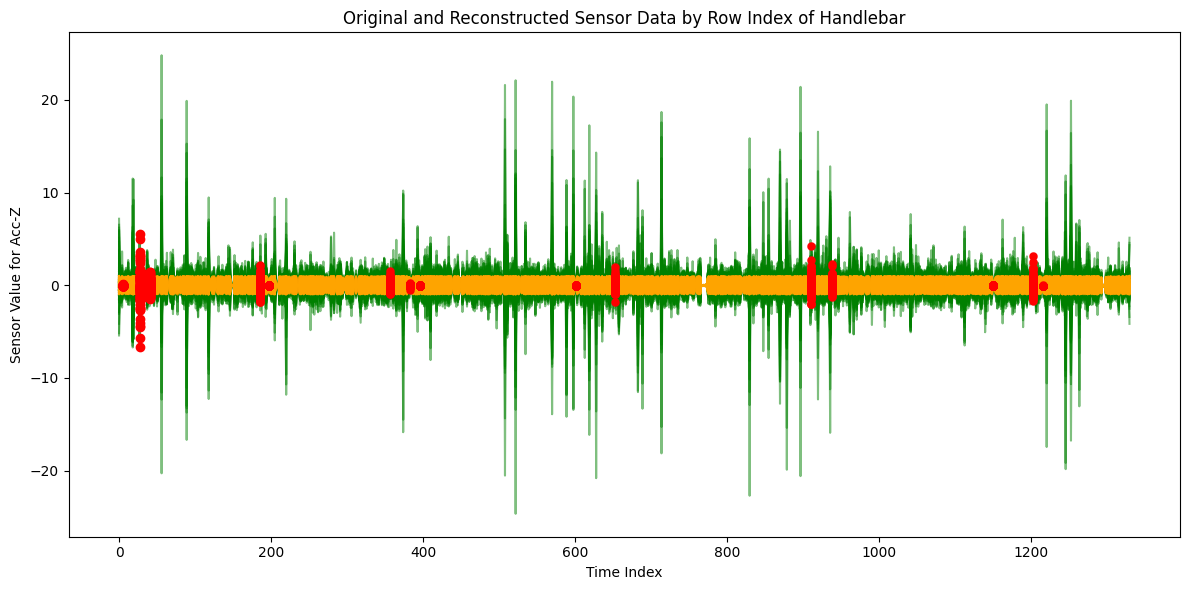

In [76]:
# reconstruct test data using autoencoder

import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your autoencoder model and combined_df ready

# 1. Select columns to plot (e.g., "Acc-Z_1" to "Acc-Z_100")
sensor_cols = [col for col in test_data_scaled_df.columns if col.startswith("Acc-Z_")]

# 2. Extract the sensor data from combined_df
sensor_data = test_data_scaled_df[sensor_cols].values

# 3. Reconstruct the data using the autoencoder
reconstructed_data = model.predict(sensor_data)

# 4. Plot the original and reconstructed data points
plt.figure(figsize=(12, 6))

# Plot original data
for i, col in enumerate(sensor_cols):
    plt.plot(test_data_scaled_df.index, sensor_data[:, i], color='green', alpha=0.5)

# Plot reconstructed data
for i, col in enumerate(sensor_cols):
    plt.plot(test_data_scaled_df.index, reconstructed_data[:, i], color='orange', alpha=0.5)

# Highlight false predictions with a vertical scatter
for row_i in false_predictions_normal:
    y_values = sensor_data[row_i, :] 
    x_values = [test_data_scaled_df.index[row_i]] * len(y_values)
    plt.scatter(x_values, y_values, color='red', alpha=1.0, zorder=3, linewidths=0.1)
for row_i in false_predictions_abnormal:
    y_values = sensor_data[row_i, :] 
    x_values = [test_data_scaled_df.index[row_i]] * len(y_values)
    plt.scatter(x_values, y_values, color='red', alpha=1.0, zorder=3)

plt.title("Original and Reconstructed Sensor Data by Row Index of Handlebar")
plt.xlabel("Time Index")
plt.ylabel("Sensor Value for Acc-Z")
plt.tight_layout()
plt.show()